In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(suppress=True)
from numpy import exp
from numpy.random import seed
seed(1)
from math import sqrt
import pandas as pd
np.set_printoptions(suppress=True)
import keras
import scipy as sp
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import InputLayer
from keras import initializers
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#cd /content/gdrive/My Drive

In [ ]:
df_temp_2016 = pd.read_csv('2016_Temp.csv')
df_temp_2016.columns = ['time','2T4048A','2T4047A','2T4046A','2T4143A','2T4141A','2T2573A','2T4145A','2T2574A','2T4137A','2T4139A']
df_temp_2016['time'] =df_temp_2016['time'].str.replace('EST', '')
df_temp_2016['Dates'] = pd.to_datetime(df_temp_2016['time']).dt.date
df_temp_2016['Time'] = pd.to_datetime(df_temp_2016['time']).dt.time       #df_temp_2016
df_temp_2016.drop('time', axis=1, inplace=True)
cols = df_temp_2016.columns.tolist()
cols =['Dates', 'Time', '2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T2573A', '2T4145A', '2T2574A', '2T4137A','2T4139A']
df_temp_2016=df_temp_2016[cols]
#df_temp_2016
#df_vib1=df_vib.drop(['first'], axis=1)
#df_vib1.head()

In [ ]:
df_temp_2016.describe()

,2T4048A,2T4047A,2T4046A,2T4143A,2T4141A,2T2573A,2T4145A,2T2574A,2T4137A,2T4139A
count,527041.000000,527041.000000,527041.000000,527041.000000,527041.000000,527041.0,527041.000000,527041.000000,527041.000000,527041.000000
mean,162.364144,157.550751,139.183845,131.006717,138.691059,0.0,297.459075,149.137493,138.641308,131.855704
std,9.927305,8.963991,5.910989,4.209212,5.412042,0.0,23.535647,7.448132,5.429313,4.832766
min,105.300000,105.800000,105.500000,108.400000,107.600000,0.0,85.600000,106.500000,107.600000,105.600000
25%,162.800000,157.900000,138.200000,129.500000,137.900000,0.0,295.800000,149.700000,137.900000,130.700000
50%,164.800000,159.600000,140.600000,131.900000,140.200000,0.0,298.800000,150.400000,140.100000,132.300000
75%,165.600000,160.300000,141.500000,133.500000,140.700000,0.0,305.200000,151.400000,140.700000,134.900000
max,169.700000,163.800000,145.000000,136.600000,143.600000,0.0,356.800000,172.200000,143.800000,137.900000


,2T4048A,2T4047A,2T4046A,2T4143A,2T4141A,2T2573A,2T4145A,2T2574A,2T4137A,2T4139A
count,527041.000000,527041.000000,527041.000000,527041.000000,527041.000000,527041.0,527041.000000,527041.000000,527041.000000,527041.000000
mean,162.364144,157.550751,139.183845,131.006717,138.691059,0.0,297.459075,149.137493,138.641308,131.855704
std,9.927305,8.963991,5.910989,4.209212,5.412042,0.0,23.535647,7.448132,5.429313,4.832766
min,105.300000,105.800000,105.500000,108.400000,107.600000,0.0,85.600000,106.500000,107.600000,105.600000
25%,162.800000,157.900000,138.200000,129.500000,137.900000,0.0,295.800000,149.700000,137.900000,130.700000
50%,164.800000,159.600000,140.600000,131.900000,140.200000,0.0,298.800000,150.400000,140.100000,132.300000
75%,165.600000,160.300000,141.500000,133.500000,140.700000,0.0,305.200000,151.400000,140.700000,134.900000
max,169.700000,163.800000,145.000000,136.600000,143.600000,0.0,356.800000,172.200000,143.800000,137.900000


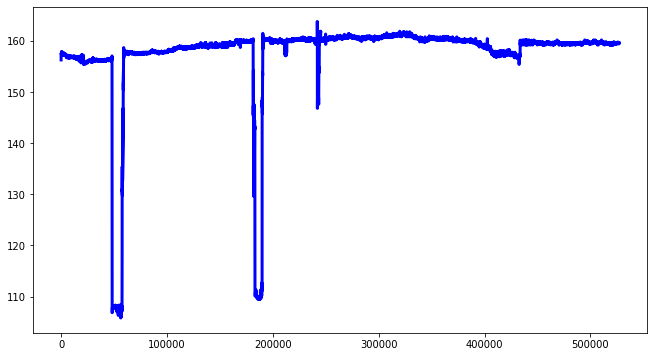

In [ ]:
'''!pip install pykalman
from pykalman import KalmanFilter
import numpy as np
kf = KalmanFilter(transition_matrices = [[1, 1], [0, 1]], observation_matrices = [[0.1, 0.5], [-0.3, 0.0]])
measurements = np.asarray([[1,0], [0,0], [0,1]])  # 3 observations
kf = kf.em(measurements, n_iter=5)
(filtered_state_means, filtered_state_covariances) = kf.filter(measurements)
(smoothed_state_means, smoothed_state_covariances) = kf.smooth(measurements)
kf'''

NameError: ignored

In [ ]:
'''df_temp_2017 = pd.read_csv('2017_Temp.csv')
df_temp_2017.columns = ['time','2T4048A','2T4047A','2T4046A','2T4143A','2T4141A','2T2573A','2T4145A','2T2574A','2T4137A','2T4139A']
df_temp_2017['time'] =df_temp_2017['time'].str.replace('EST', '')
df_temp_2017['Dates'] = pd.to_datetime(df_temp_2017['time']).dt.date
df_temp_2017['Time'] = pd.to_datetime(df_temp_2017['time']).dt.time#df_temp_2017
df_temp_2017.drop('time', axis=1, inplace=True)
cols = df_temp_2017.columns.tolist()
cols =['Dates', 'Time', '2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T2573A', '2T4145A', '2T2574A', '2T4137A','2T4139A']
df_temp_2017=df_temp_2017[cols]
#df_temp_2017
#df_vib1=df_vib.drop(['first'], axis=1)
#df_vib1.head()'''

"df_temp_2017 = pd.read_csv('2017_Temp.csv')\ndf_temp_2017.columns = ['time','2T4048A','2T4047A','2T4046A','2T4143A','2T4141A','2T2573A','2T4145A','2T2574A','2T4137A','2T4139A']\ndf_temp_2017['time'] =df_temp_2017['time'].str.replace('EST', '')\ndf_temp_2017['Dates'] = pd.to_datetime(df_temp_2017['time']).dt.date\ndf_temp_2017['Time'] = pd.to_datetime(df_temp_2017['time']).dt.time#df_temp_2017\ndf_temp_2017.drop('time', axis=1, inplace=True)\ncols = df_temp_2017.columns.tolist()\ncols =['Dates', 'Time', '2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T2573A', '2T4145A', '2T2574A', '2T4137A','2T4139A']\ndf_temp_2017=df_temp_2017[cols]\n#df_temp_2017\n#df_vib1=df_vib.drop(['first'], axis=1)\n#df_vib1.head()"

In [ ]:
'''df_temp_2018 = pd.read_csv('2018_Temp.csv')
df_temp_2018.columns = ['time','2T4048A','2T4047A','2T4046A','2T4143A','2T4141A','2T2573A','2T4145A','2T2574A','2T4137A','2T4139A']
df_temp_2018['time'] =df_temp_2018['time'].str.replace('EST', '')
df_temp_2018['Dates'] = pd.to_datetime(df_temp_2018['time']).dt.date
df_temp_2018['Time'] = pd.to_datetime(df_temp_2018['time']).dt.time#df_temp_2018
df_temp_2018.drop('time', axis=1, inplace=True)
cols = df_temp_2018.columns.tolist()
cols =['Dates', 'Time', '2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T2573A', '2T4145A', '2T2574A', '2T4137A','2T4139A']
df_temp_2018=df_temp_2018[cols]
#df_temp_2018
#df_vib1=df_vib.drop(['first'], axis=1)
#df_vib1.head()'''

"df_temp_2018 = pd.read_csv('2018_Temp.csv')\ndf_temp_2018.columns = ['time','2T4048A','2T4047A','2T4046A','2T4143A','2T4141A','2T2573A','2T4145A','2T2574A','2T4137A','2T4139A']\ndf_temp_2018['time'] =df_temp_2018['time'].str.replace('EST', '')\ndf_temp_2018['Dates'] = pd.to_datetime(df_temp_2018['time']).dt.date\ndf_temp_2018['Time'] = pd.to_datetime(df_temp_2018['time']).dt.time#df_temp_2018\ndf_temp_2018.drop('time', axis=1, inplace=True)\ncols = df_temp_2018.columns.tolist()\ncols =['Dates', 'Time', '2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T2573A', '2T4145A', '2T2574A', '2T4137A','2T4139A']\ndf_temp_2018=df_temp_2018[cols]\n#df_temp_2018\n#df_vib1=df_vib.drop(['first'], axis=1)\n#df_vib1.head()"

In [ ]:
3.9**-5

0.0011083501001765614

In [ ]:
'''df_temp_2019 = pd.read_csv('2019_Temp.csv')
df_temp_2019.columns = ['time','2T4048A','2T4047A','2T4046A','2T4143A','2T4141A','2T2573A','2T4145A','2T2574A','2T4137A','2T4139A']
df_temp_2019['time'] =df_temp_2019['time'].str.replace('EST', '')
df_temp_2019['Dates'] = pd.to_datetime(df_temp_2019['time']).dt.date
df_temp_2019['Time'] = pd.to_datetime(df_temp_2019['time']).dt.time#df_temp_2019
df_temp_2019.drop('time', axis=1, inplace=True)
cols = df_temp_2019.columns.tolist()
cols =['Dates', 'Time', '2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T2573A', '2T4145A', '2T2574A', '2T4137A','2T4139A']
df_temp_2019=df_temp_2019[cols]
#df_temp_2019
#df_vib1=df_vib.drop(['first'], axis=1)
#df_vib1.head()'''

"df_temp_2019 = pd.read_csv('2019_Temp.csv')\ndf_temp_2019.columns = ['time','2T4048A','2T4047A','2T4046A','2T4143A','2T4141A','2T2573A','2T4145A','2T2574A','2T4137A','2T4139A']\ndf_temp_2019['time'] =df_temp_2019['time'].str.replace('EST', '')\ndf_temp_2019['Dates'] = pd.to_datetime(df_temp_2019['time']).dt.date\ndf_temp_2019['Time'] = pd.to_datetime(df_temp_2019['time']).dt.time#df_temp_2019\ndf_temp_2019.drop('time', axis=1, inplace=True)\ncols = df_temp_2019.columns.tolist()\ncols =['Dates', 'Time', '2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T2573A', '2T4145A', '2T2574A', '2T4137A','2T4139A']\ndf_temp_2019=df_temp_2019[cols]\n#df_temp_2019\n#df_vib1=df_vib.drop(['first'], axis=1)\n#df_vib1.head()"

In [ ]:
#df_temp_2019.shape

In [ ]:
'''df_temp_2020 = pd.read_csv('2020_Temp.csv')
df_temp_2020.columns = ['time','2T4048A','2T4047A','2T4046A','2T4143A','2T4141A','2T2573A','2T4145A','2T2574A','2T4137A','2T4139A']
df_temp_2020['time'] =df_temp_2020['time'].str.replace('EST', '')
df_temp_2020['Dates'] = pd.to_datetime(df_temp_2020['time']).dt.date
df_temp_2020['Time'] = pd.to_datetime(df_temp_2020['time']).dt.time#df_temp_2020
df_temp_2020.drop('time', axis=1, inplace=True)
cols = df_temp_2020.columns.tolist()
cols =['Dates', 'Time', '2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T2573A', '2T4145A', '2T2574A', '2T4137A','2T4139A']
df_temp_2020=df_temp_2020[cols]
df_temp_2020
#df_vib1=df_vib.drop(['first'], axis=1)
#df_vib1.head()'''

"df_temp_2020 = pd.read_csv('2020_Temp.csv')\ndf_temp_2020.columns = ['time','2T4048A','2T4047A','2T4046A','2T4143A','2T4141A','2T2573A','2T4145A','2T2574A','2T4137A','2T4139A']\ndf_temp_2020['time'] =df_temp_2020['time'].str.replace('EST', '')\ndf_temp_2020['Dates'] = pd.to_datetime(df_temp_2020['time']).dt.date\ndf_temp_2020['Time'] = pd.to_datetime(df_temp_2020['time']).dt.time#df_temp_2020\ndf_temp_2020.drop('time', axis=1, inplace=True)\ncols = df_temp_2020.columns.tolist()\ncols =['Dates', 'Time', '2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T2573A', '2T4145A', '2T2574A', '2T4137A','2T4139A']\ndf_temp_2020=df_temp_2020[cols]\ndf_temp_2020\n#df_vib1=df_vib.drop(['first'], axis=1)\n#df_vib1.head()"

In [ ]:
df_temp_2016_1 = df_temp_2016.iloc[:-1]
df_temp_2016_1

,Dates,Time,2T4048A,2T4047A,2T4046A,2T4143A,2T4141A,2T2573A,2T4145A,2T2574A,2T4137A,2T4139A
0,2016-01-01,00:00:00,161.5,157.7,139.6,129.5,138.7,0,298.0,150.7,138.8,130.4
1,2016-01-01,00:01:00,161.4,157.6,139.5,129.6,138.8,0,298.0,150.7,138.8,130.3
2,2016-01-01,00:02:00,161.3,157.5,139.5,129.6,138.8,0,298.0,150.7,138.8,130.3
3,2016-01-01,00:03:00,161.3,157.5,139.5,129.6,138.8,0,298.0,150.7,138.8,130.3
4,2016-01-01,00:04:00,161.3,157.5,139.5,129.6,138.8,0,298.0,150.7,138.8,130.3
...,...,...,...,...,...,...,...,...,...,...,...,...
527035,2016-12-31,23:55:00,164.9,159.6,140.7,131.9,140.7,0,297.3,153.5,140.8,131.3
527036,2016-12-31,23:56:00,164.9,159.6,140.7,131.9,140.7,0,297.3,153.5,140.8,131.3
527037,2016-12-31,23:57:00,164.9,159.6,140.7,131.9,140.7,0,297.3,153.5,140.8,131.3
527038,2016-12-31,23:58:00,164.9,159.6,140.7,131.9,140.7,0,297.3,153.5,140.8,131.3


In [ ]:
#df_temp_all=pd.concat([df_temp_2016_1, df_temp_2017_1, df_temp_2018_1, df_temp_2019_1,df_temp_2020_1])
#df_temp_all.shape

In [ ]:
#df_temp_all.head()

In [ ]:
#df_temp_2020_1.head()

In [ ]:
df_temp_2016.shape
#df_temp_2016.describe()

(527041, 12)

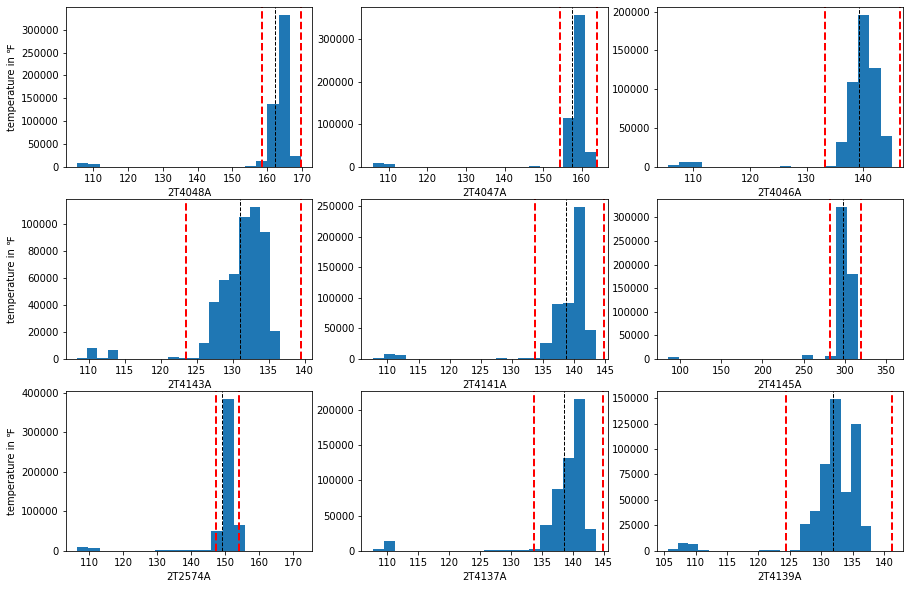

In [ ]:
#'2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T4145A', '2T2574A', '2T4137A', '2T4139A'
#'2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T4145A', '2T2574A', '2T4137A', '2T4139A'
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df_temp_2016_1['2T4048A'], density=False, bins=20)
plt.ylabel('temperature in ℉')
plt.xlabel('2T4048A')
plt.axvline(df_temp_2016_1['2T4048A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp_2016_1['2T4048A'], [25])-1.5*(np.percentile(df_temp_2016_1['2T4048A'], [75])-np.percentile(df_temp_2016_1['2T4048A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp_2016_1['2T4048A'], [75])+1.5*(np.percentile(df_temp_2016_1['2T4048A'], [75])-np.percentile(df_temp_2016_1['2T4048A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,2)
plt.hist(df_temp_2016_1['2T4047A'], density=False, bins=20)
plt.ylabel('')
plt.xlabel('2T4047A')
plt.axvline(df_temp_2016_1['2T4047A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp_2016_1['2T4047A'], [25])-1.5*(np.percentile(df_temp_2016_1['2T4047A'], [75])-np.percentile(df_temp_2016_1['2T4047A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp_2016_1['2T4047A'], [75])+1.5*(np.percentile(df_temp_2016_1['2T4047A'], [75])-np.percentile(df_temp_2016_1['2T4047A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,3)
plt.hist(df_temp_2016_1['2T4046A'], density=False, bins=20)
plt.ylabel('')
plt.xlabel('2T4046A')
plt.axvline(df_temp_2016_1['2T4046A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp_2016_1['2T4046A'], [25])-1.5*(np.percentile(df_temp_2016_1['2T4046A'], [75])-np.percentile(df_temp_2016_1['2T4046A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp_2016_1['2T4046A'], [75])+1.5*(np.percentile(df_temp_2016_1['2T4046A'], [75])-np.percentile(df_temp_2016_1['2T4046A'], [25])), color='red', linestyle='dashed', linewidth=2)
#'2T4143A', '2T4141A', '2T4145A', '2T2574A', '2T4137A', '2T4139A'
plt.subplot(3,3,4)
plt.hist(df_temp_2016_1['2T4143A'], density=False, bins=20)
plt.ylabel('temperature in ℉')
plt.xlabel('2T4143A')
plt.axvline(df_temp_2016_1['2T4143A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp_2016_1['2T4143A'], [25])-1.5*(np.percentile(df_temp_2016_1['2T4143A'], [75])-np.percentile(df_temp_2016_1['2T4143A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp_2016_1['2T4143A'], [75])+1.5*(np.percentile(df_temp_2016_1['2T4143A'], [75])-np.percentile(df_temp_2016_1['2T4143A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,5)
plt.hist(df_temp_2016_1['2T4141A'], density=False, bins=20)
plt.ylabel('')
plt.xlabel('2T4141A')
plt.axvline(df_temp_2016_1['2T4141A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp_2016_1['2T4141A'], [25])-1.5*(np.percentile(df_temp_2016_1['2T4141A'], [75])-np.percentile(df_temp_2016_1['2T4141A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp_2016_1['2T4141A'], [75])+1.5*(np.percentile(df_temp_2016_1['2T4141A'], [75])-np.percentile(df_temp_2016_1['2T4141A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,6)
plt.hist(df_temp_2016_1['2T4145A'], density=False, bins=20)
plt.ylabel('')
plt.xlabel('2T4145A')
plt.axvline(df_temp_2016_1['2T4145A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp_2016_1['2T4145A'], [25])-1.5*(np.percentile(df_temp_2016_1['2T4145A'], [75])-np.percentile(df_temp_2016_1['2T4145A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp_2016_1['2T4145A'], [75])+1.5*(np.percentile(df_temp_2016_1['2T4145A'], [75])-np.percentile(df_temp_2016_1['2T4145A'], [25])), color='red', linestyle='dashed', linewidth=2)
#'2T2574A', '2T4137A', '2T4139A'
plt.subplot(3,3,7)
plt.hist(df_temp_2016_1['2T2574A'], density=False, bins=20)
plt.ylabel('temperature in ℉')
plt.xlabel('2T2574A')
plt.axvline(df_temp_2016_1['2T2574A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp_2016_1['2T2574A'], [25])-1.5*(np.percentile(df_temp_2016_1['2T2574A'], [75])-np.percentile(df_temp_2016_1['2T2574A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp_2016_1['2T2574A'], [75])+1.5*(np.percentile(df_temp_2016_1['2T2574A'], [75])-np.percentile(df_temp_2016_1['2T2574A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,8)
plt.hist(df_temp_2016_1['2T4137A'], density=False, bins=20)
plt.ylabel('')
plt.xlabel('2T4137A')
plt.axvline(df_temp_2016_1['2T4137A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp_2016_1['2T4137A'], [25])-1.5*(np.percentile(df_temp_2016_1['2T4137A'], [75])-np.percentile(df_temp_2016_1['2T4137A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp_2016_1['2T4137A'], [75])+1.5*(np.percentile(df_temp_2016_1['2T4137A'], [75])-np.percentile(df_temp_2016_1['2T4137A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(3,3,9)
plt.hist(df_temp_2016_1['2T4139A'], density=False, bins=20)
plt.ylabel('')
plt.xlabel('2T4139A')
plt.axvline(df_temp_2016_1['2T4139A'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_temp_2016_1['2T4139A'], [25])-1.5*(np.percentile(df_temp_2016_1['2T4139A'], [75])-np.percentile(df_temp_2016_1['2T4139A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_temp_2016_1['2T4139A'], [75])+1.5*(np.percentile(df_temp_2016_1['2T4139A'], [75])-np.percentile(df_temp_2016_1['2T4139A'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.savefig('temp_hist.png')
#files.download(temp_hist.png)


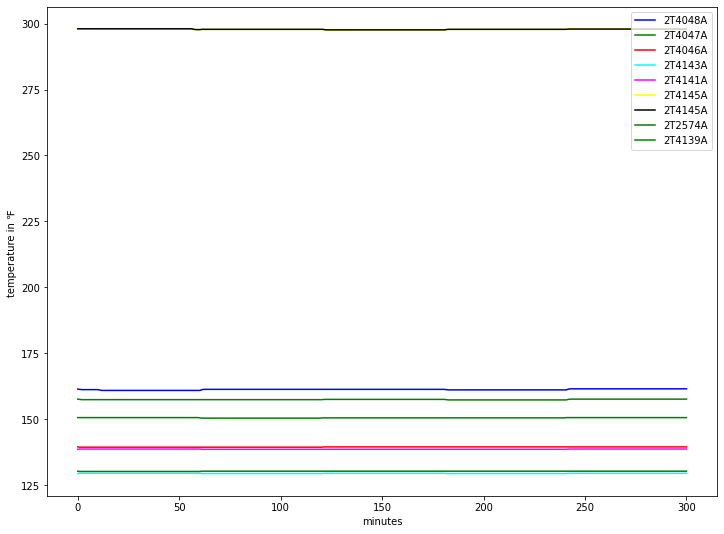

In [ ]:
#'2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T4145A', '2T2574A', '2T4137A', '2T4139A'
#'2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T4145A', '2T2574A', '2T4137A', '2T4139A'
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 300,300)
plt.xlabel('minutes')
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, df_temp_2016_1['2T4048A'].head(300), label='2T4048A' , color='blue')
plt.plot(x, df_temp_2016_1['2T4047A'].head(300),label='2T4047A' , color='green')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_1['2T4046A'].head(300), label='2T4046A' ,color='red')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_1['2T4143A'].head(300),label='2T4143A' , color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_1['2T4141A'].head(300), label='2T4141A' ,color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_1['2T4145A'].head(300), label='2T4145A' ,color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_1['2T4145A'].head(300),label='2T4145A' , color='black')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_1['2T2574A'].head(300),label='2T2574A' , color='g')
plt.plot(x, df_temp_2016_1['2T4139A'].head(300),label='2T4139A' , color='g')           # short color code (rgbcmyk)ax.legend(loc='upper right')
# short color code (rgbcmyk)ax.legend(loc='upper right')
ax.legend(loc='upper right')

plt.show()

In [ ]:
#df_temp_2016_1.dtypes
# to find the rows for the values of 2T4048A 100 to 120 which is at the lower end
df_temp_2016_2=df_temp_2016_1[df_temp_2016_1['2T4048A'].between(100, 120, inclusive=False)]
indexes=df_temp_2016_2.index.values
# to print the full array
np.set_printoptions(threshold=np.inf)
#indexes


In [ ]:
df_temp_2016_3=df_temp_2016_1.iloc[48121:57636, ]
#df_temp_2016_3.hist()
#fig = plt.figure(figsize = (15,20))
#ax = fig.gca()
#df_temp_2016_3.hist(ax = ax)
df_temp_2016_3.describe()

,2T4048A,2T4047A,2T4046A,2T4143A,2T4141A,2T2573A,2T4145A,2T2574A,2T4137A,2T4139A
count,9515.000000,9515.000000,9515.000000,9515.000000,9515.000000,9515.0,9515.000000,9515.000000,9515.000000,9515.000000
mean,107.445602,107.761797,107.565265,110.662890,109.742491,0.0,242.872275,108.783805,109.574283,107.926548
std,0.684092,0.582926,0.533657,0.676244,0.530966,0.0,34.685354,0.591405,0.513367,0.666530
min,105.300000,105.800000,105.500000,108.400000,107.600000,0.0,136.200000,106.500000,107.600000,105.600000
25%,107.200000,107.600000,107.400000,110.400000,109.500000,0.0,255.000000,108.600000,109.400000,107.700000
50%,107.600000,107.900000,107.800000,110.800000,109.900000,0.0,256.600000,108.900000,109.800000,108.100000
75%,107.800000,108.100000,107.900000,111.000000,110.100000,0.0,257.700000,109.100000,109.900000,108.400000
max,117.000000,116.100000,110.800000,121.900000,112.300000,0.0,291.000000,114.300000,112.000000,114.700000


In [ ]:
#indexes3

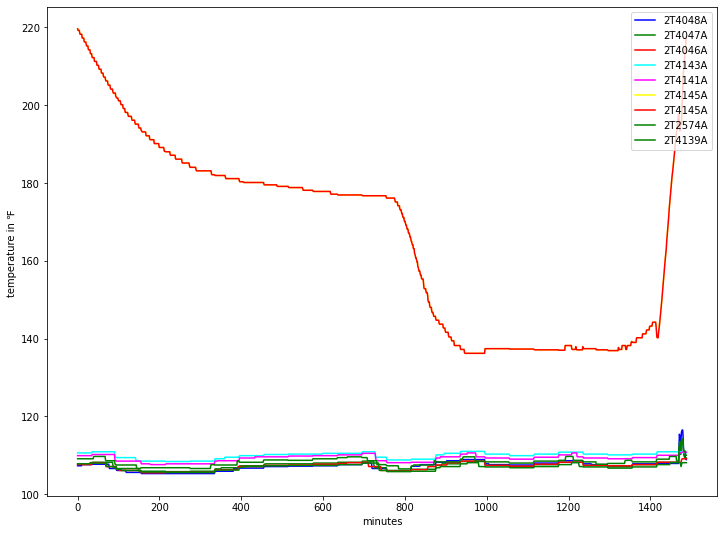

In [ ]:
df_temp_2016_4=df_temp_2016_1[df_temp_2016_1['2T4145A'].between(100, 220, inclusive=False)]
#df_temp_2016_4.shape
#'2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T4145A', '2T2574A', '2T4137A', '2T4139A'
#'2T4048A', '2T4047A', '2T4046A', '2T4143A', '2T4141A', '2T4145A', '2T2574A', '2T4137A', '2T4139A'
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 1488,1488)
plt.xlabel('minutes')
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, df_temp_2016_4['2T4048A'].head(1488), label='2T4048A' , color='blue')
plt.plot(x, df_temp_2016_4['2T4047A'].head(1488),label='2T4047A' , color='green')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T4046A'].head(1488), label='2T4046A' ,color='red')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T4143A'].head(1488),label='2T4143A' , color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T4141A'].head(1488), label='2T4141A' ,color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T4145A'].head(1488), label='2T4145A' ,color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T4145A'].head(1488),label='2T4145A' , color='red')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T2574A'].head(1488),label='2T2574A' , color='g')
plt.plot(x, df_temp_2016_4['2T4139A'].head(1488),label='2T4139A' , color='g')           # short color code (rgbcmyk)ax.legend(loc='upper right')
# short color code (rgbcmyk)ax.legend(loc='upper right')
ax.legend(loc='upper right')

plt.show()

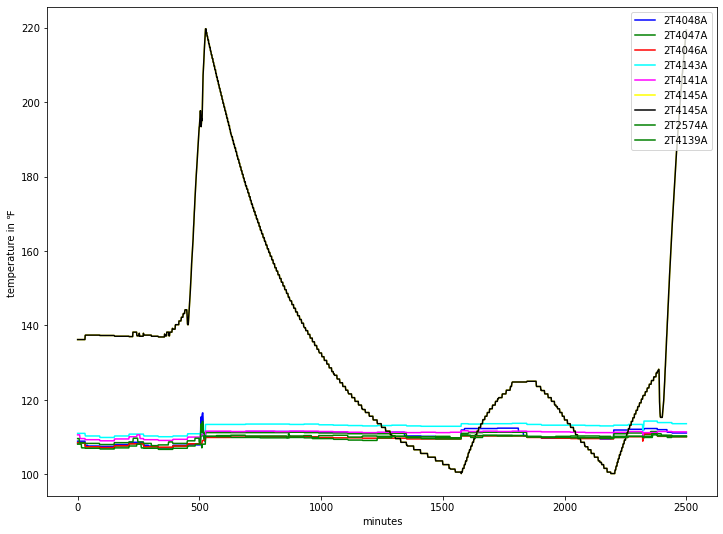

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 2500,2500)
plt.xlabel('minutes')
plt.ylabel('temperature in ℉ ')      # specify color by name
plt.plot(x, df_temp_2016_4['2T4048A'].tail(2500), label='2T4048A' , color='blue')
plt.plot(x, df_temp_2016_4['2T4047A'].tail(2500),label='2T4047A' , color='green')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T4046A'].tail(2500), label='2T4046A' ,color='red')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T4143A'].tail(2500),label='2T4143A' , color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T4141A'].tail(2500), label='2T4141A' ,color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T4145A'].tail(2500), label='2T4145A' ,color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T4145A'].tail(2500),label='2T4145A' , color='black')           # short color code (rgbcmyk)
plt.plot(x, df_temp_2016_4['2T2574A'].tail(2500),label='2T2574A' , color='g')
plt.plot(x, df_temp_2016_4['2T4139A'].tail(2500),label='2T4139A' , color='g')           # short color code (rgbcmyk)ax.legend(loc='upper right')
# short color code (rgbcmyk)ax.legend(loc='upper right')
ax.legend(loc='upper right')

plt.show()
#which one is measurement point 2T4048A?

In [ ]:
df_vib_2016 = pd.read_csv('2016_Vibration.csv')
df_vib_2016.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018A']
df_vib_2016['time'] =df_vib_2016['first'].str.replace('EST', '')
df_vib_2016['Dates'] = pd.to_datetime(df_vib_2016['time'] ).dt.date
df_vib_2016['Time'] = pd.to_datetime(df_vib_2016['time'] ).dt.time #df_vib_2016


In [ ]:
df_vib_2016.columns

Index(['first', 'A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A', 'A2V9015A',
       'A2V9014A', 'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A', 'A2V9018A',
       'time', 'Dates', 'Time'],
      dtype='object')

In [ ]:
!pip install tsmoothie
from tsmoothie.smoother import *
from tsmoothie.utils_func import create_windows

In [ ]:
smoother = KalmanSmoother(component='level_longseason',
                          component_noise={'level':0.1, 'longseason':0.1},
                          n_longseasons=365)
smoother.smooth(df_vib_2016[['A2V9005A', 'A2V9004A', 'A2V9007A']].T)

<tsmoothie.smoother.KalmanSmoother>

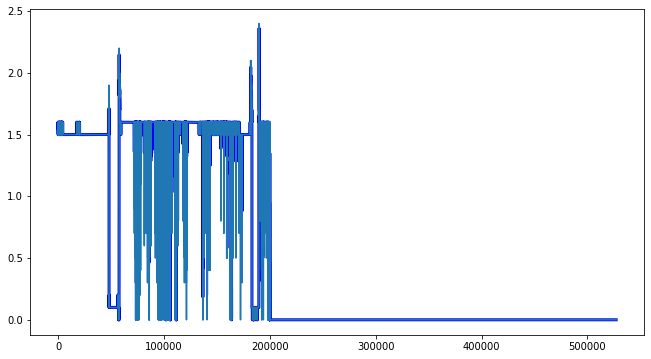

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
#plt.plot(df_vib_2016['A2V9005A'], linewidth=3, color='blue')


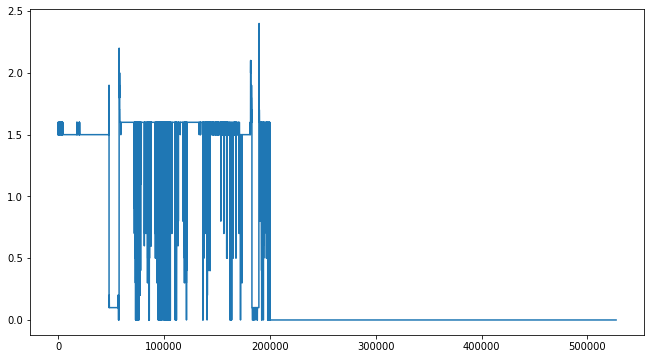

In [ ]:
plt.figure(figsize=(11,6))
plt.plot(df_vib_2016['A2V9005A'])

In [ ]:
smoother.smooth_data[0].std()

0.7339798598392238

In [ ]:
'''df_vib_2017 = pd.read_csv('2017_Vibration.csv')
df_vib_2017.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018A']
df_vib_2017['time'] =df_vib_2017['first'].str.replace('EST', '')
df_vib_2017['Dates'] = pd.to_datetime(df_vib_2017['time']).dt.date
df_vib_2017['Time'] = pd.to_datetime(df_vib_2017['time']).dt.time#df_vib_2017'''

"df_vib_2017 = pd.read_csv('2017_Vibration.csv')\ndf_vib_2017.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018A']\ndf_vib_2017['time'] =df_vib_2017['first'].str.replace('EST', '')\ndf_vib_2017['Dates'] = pd.to_datetime(df_vib_2017['time']).dt.date\ndf_vib_2017['Time'] = pd.to_datetime(df_vib_2017['time']).dt.time#df_vib_2017"

In [ ]:
#df_vib_2017.shape

In [ ]:
'''df_vib_2018 = pd.read_csv('2018_Vibration.csv')
df_vib_2018.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018A']
df_vib_2018['time'] =df_vib_2018['first'].str.replace('EST', '')
df_vib_2018['Dates'] = pd.to_datetime(df_vib_2018['time']).dt.date
df_vib_2018['Time'] = pd.to_datetime(df_vib_2018['time']).dt.time#df_vib_2018'''

"df_vib_2018 = pd.read_csv('2018_Vibration.csv')\ndf_vib_2018.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018A']\ndf_vib_2018['time'] =df_vib_2018['first'].str.replace('EST', '')\ndf_vib_2018['Dates'] = pd.to_datetime(df_vib_2018['time']).dt.date\ndf_vib_2018['Time'] = pd.to_datetime(df_vib_2018['time']).dt.time#df_vib_2018"

In [ ]:
#df_vib_2018.shape

In [ ]:
'''df_vib_2019 = pd.read_csv('2019_Vibration.csv')
df_vib_2019.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018A']
df_vib_2019['time'] =df_vib_2019['first'].str.replace('EST', '')
df_vib_2019['Dates'] = pd.to_datetime(df_vib_2019['time']).dt.date
df_vib_2019['Time'] = pd.to_datetime(df_vib_2019['time']).dt.time#df_vib_2019'''

"df_vib_2019 = pd.read_csv('2019_Vibration.csv')\ndf_vib_2019.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018A']\ndf_vib_2019['time'] =df_vib_2019['first'].str.replace('EST', '')\ndf_vib_2019['Dates'] = pd.to_datetime(df_vib_2019['time']).dt.date\ndf_vib_2019['Time'] = pd.to_datetime(df_vib_2019['time']).dt.time#df_vib_2019"

In [ ]:
#df_vib_2019.shape

In [ ]:
'''df_vib_2020 = pd.read_csv('2020_Vibration.csv')
df_vib_2020.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018A']
df_vib_2020['time'] =df_vib_2020['first'].str.replace('EST', '')
df_vib_2020['Dates'] = pd.to_datetime(df_vib_2020['time']).dt.date
df_vib_2020['Time'] = pd.to_datetime(df_vib_2020['time']).dt.time#df_vib_2020'''

"df_vib_2020 = pd.read_csv('2020_Vibration.csv')\ndf_vib_2020.columns = ['first','A2V9005A','A2V9004A','A2V9007A','A2V9006A','A2V9015A','A2V9014A','A2V9017A','A2V9016A','A2V9021A','A2V9019A','A2V9018A']\ndf_vib_2020['time'] =df_vib_2020['first'].str.replace('EST', '')\ndf_vib_2020['Dates'] = pd.to_datetime(df_vib_2020['time']).dt.date\ndf_vib_2020['Time'] = pd.to_datetime(df_vib_2020['time']).dt.time#df_vib_2020"

In [ ]:
#df_vib_2020.shape

In [ ]:
#df_vib_2016.drop('first', axis=1, inplace=True)
cols = df_vib_2016.columns.tolist()
cols=['Dates', 'Time','A2V9005A',  'A2V9004A', 'A2V9007A',  'A2V9006A', 'A2V9015A', 'A2V9014A', 'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A',
      'A2V9018A']
df_vib_2016=df_vib_2016[cols]
df_vib_2016.shape

(527041, 13)

In [ ]:
df_vib_2016_hist=df_vib_2016[['A2V9005A',  'A2V9004A', 'A2V9007A',  'A2V9006A', 'A2V9015A', 'A2V9014A', 'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A',
      'A2V9018A']]
df_vib_2016_hist.dtypes

A2V9005A    float64
A2V9004A    float64
A2V9007A    float64
A2V9006A    float64
A2V9015A    float64
A2V9014A    float64
A2V9017A    float64
A2V9016A    float64
A2V9021A    float64
A2V9019A    float64
A2V9018A    float64
dtype: object

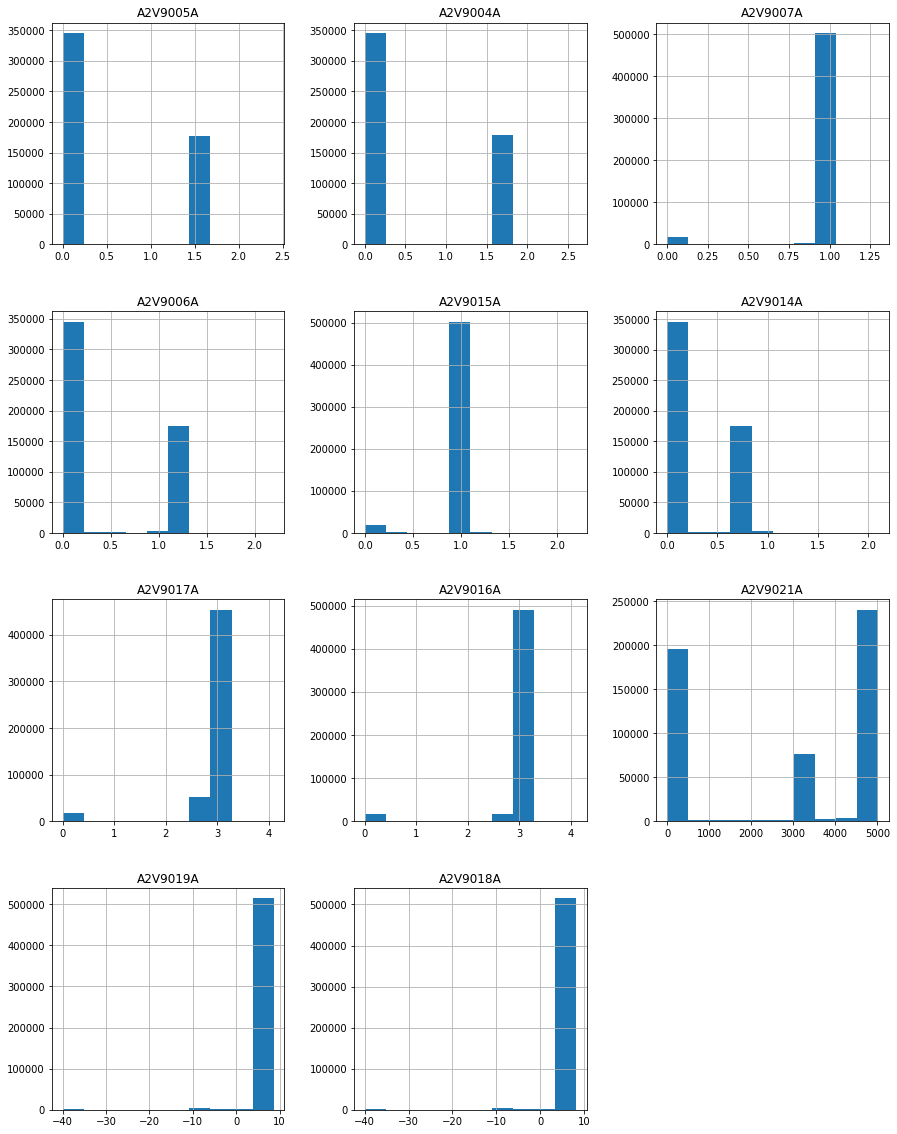

In [ ]:
df_vib_2016_hist.hist(figsize = (15,20))
plt.show()

In [ ]:
df_vib_2016.A2V9007A.unique()
df_vib_2016.describe()

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,A2V9018A
count,527041.000000,527041.000000,527041.000000,527041.000000,527041.000000,527041.000000,527041.000000,527041.000000,527041.000000,527041.000000,527041.000000
mean,0.536801,0.562093,0.964984,0.391202,0.877442,0.254244,2.781802,2.875794,2798.486773,6.497808,6.743830
std,0.737075,0.770936,0.171272,0.536364,0.159123,0.347449,0.528223,0.543039,2231.683215,3.663181,3.733345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.000000,-40.000000
25%,0.000000,0.000000,1.000000,0.000000,0.900000,0.000000,2.900000,3.000000,0.000000,7.000000,7.200000
50%,0.000000,0.000000,1.000000,0.000000,0.900000,0.000000,2.900000,3.000000,3388.200000,7.100000,7.400000
75%,1.500000,1.600000,1.000000,1.100000,0.900000,0.700000,2.900000,3.000000,4883.200000,7.100000,7.400000
max,2.400000,2.600000,1.300000,2.200000,2.200000,2.100000,4.100000,4.100000,5024.500000,8.700000,8.200000


In [ ]:
df_vib_2016_1=df_vib_2016[df_vib_2016['A2V9007A'].between(.3, .6, inclusive=True)]
df_vib_2016_2=df_vib_2016[df_vib_2016['A2V9021A'].between(1000, 3000, inclusive=True)]
df_vib_2016_3=df_vib_2016[df_vib_2016['A2V9019A']<0]
df_vib_2016_3

,Dates,Time,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,A2V9018A
48120,2016-02-03,10:00:00,1.6,1.5,0.9,0.6,0.5,0.5,1.8,1.8,317.9,-0.1,0.2
56803,2016-02-09,10:43:00,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,-0.1,0.1
56804,2016-02-09,10:44:00,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,-0.2,0.1
56805,2016-02-09,10:45:00,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,-0.3,0.0
56806,2016-02-09,10:46:00,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,-0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199962,2016-05-18,20:42:00,0.6,0.6,0.3,0.4,0.3,0.3,1.0,1.1,2193.0,-23.5,-23.4
199963,2016-05-18,20:43:00,1.1,1.1,0.8,0.7,0.8,0.6,2.3,2.4,3804.2,-1.9,2.9
199964,2016-05-18,20:44:00,0.2,0.2,0.1,0.1,0.1,0.1,0.3,0.3,489.2,-27.0,-35.2
199966,2016-05-18,20:46:00,0.0,0.0,1.0,0.0,0.3,0.3,1.0,1.1,2476.1,-23.5,-23.4


In [ ]:
print(len(df_vib_2016.A2V9005A.unique()),len(df_vib_2016.A2V9004A.unique()), len(df_vib_2016.A2V9007A.unique()), len(df_vib_2016.A2V9006A.unique()), len(df_vib_2016.A2V9015A.unique()), len(df_vib_2016.A2V9014A.unique()),
len(df_vib_2016.A2V9017A.unique()), len(df_vib_2016.A2V9016A.unique()), len(df_vib_2016.A2V9021A.unique()), len(df_vib_2016.A2V9019A.unique()) , len(df_vib_2016.A2V9018A.unique()) )

25 27 14 23 22 18 36 38 15584 459 444


In [ ]:
df_vib_2016.dtypes

Dates        object
Time         object
A2V9005A    float64
A2V9004A    float64
A2V9007A    float64
A2V9006A    float64
A2V9015A    float64
A2V9014A    float64
A2V9017A    float64
A2V9016A    float64
A2V9021A    float64
A2V9019A    float64
A2V9018A    float64
dtype: object

In [ ]:
df_vib_2016['A2V9021A']
df_rpm_0=df_vib_2016.loc[df_vib_2016['A2V9021A'] ==0.0]
df_rpm_0
# below is an part of vibration data where rpm is 0
df_rpm_0_lineplot=df_rpm_0.iloc[ 0:300 , : ]
df_rpm_0_lineplot.describe()

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,A2V9018A
count,300.000000,300.00000,3.000000e+02,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,300.000000,300.000000
mean,0.145667,0.16400,1.000000e-01,0.177667,0.080000,0.096667,0.035667,0.064000,0.0,8.157667,7.689333
std,0.049895,0.04808,5.143361e-16,0.041718,0.040067,0.028134,0.047982,0.055204,0.0,1.012551,0.876535
min,0.100000,0.10000,1.000000e-01,0.100000,0.000000,0.000000,0.000000,0.000000,0.0,4.500000,4.600000
25%,0.100000,0.10000,1.000000e-01,0.200000,0.100000,0.100000,0.000000,0.000000,0.0,8.300000,7.800000
50%,0.100000,0.20000,1.000000e-01,0.200000,0.100000,0.100000,0.000000,0.100000,0.0,8.500000,7.900000
75%,0.200000,0.20000,1.000000e-01,0.200000,0.100000,0.100000,0.100000,0.100000,0.0,8.600000,8.100000
max,0.200000,0.20000,1.000000e-01,0.200000,0.100000,0.200000,0.100000,0.200000,0.0,8.700000,8.200000


In [ ]:
527011-527040

-29

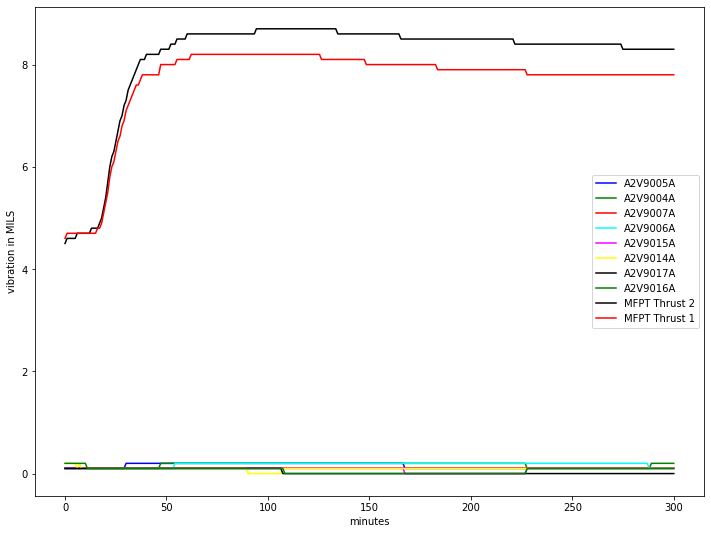

In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 300,300)
plt.xlabel('minutes')
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, df_rpm_0_lineplot['A2V9005A'],label="A2V9005A", color='blue' )
plt.plot(x, df_rpm_0_lineplot['A2V9004A'],label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_0_lineplot['A2V9007A'],label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_0_lineplot['A2V9006A'],label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_0_lineplot['A2V9015A'],label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_0_lineplot['A2V9014A'],label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_0_lineplot['A2V9017A'],label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_0_lineplot['A2V9016A'],label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_0_lineplot['A2V9019A'],label="MFPT Thrust 2", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_0_lineplot['A2V9018A'],label="MFPT Thrust 1", color='red')           # short color code (rgbcmyk)

# twin object for two different y-axis on the sample plot
ax.legend(loc='center right')
plt.show()

In [ ]:
df_rpm_4750=df_vib_2016.loc[df_vib_2016['A2V9021A']>4750]
#df_rpm_4750.head(300)

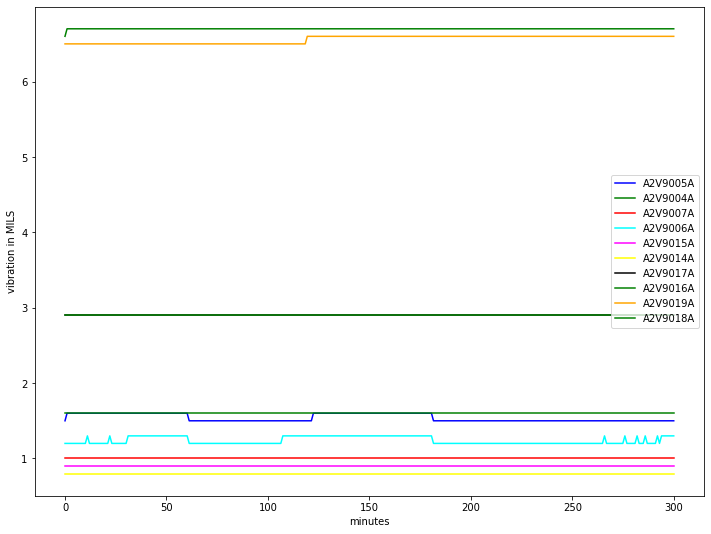

In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 300,300)
plt.xlabel('minutes')
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, df_rpm_4750['A2V9005A'].head(300),label="A2V9005A", color='blue' )
plt.plot(x, df_rpm_4750['A2V9004A'].head(300),label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_4750['A2V9007A'].head(300),label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_4750['A2V9006A'].head(300),label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_4750['A2V9015A'].head(300),label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_4750['A2V9014A'].head(300),label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_4750['A2V9017A'].head(300),label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_4750['A2V9016A'].head(300),label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_4750['A2V9019A'].head(300),label="A2V9019A", color='orange')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_4750['A2V9018A'].head(300),label="A2V9018A", color='g')           # short color code (rgbcmyk)

# twin object for two different y-axis on the sample plot
ax.legend(loc='center right')
plt.show()

In [ ]:
df_rpm_middle= df_vib_2016[(df_vib_2016['A2V9021A'] >= 3250) & (df_vib_2016['A2V9021A'] <= 3500)]
df_rpm_middle.describe()

,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,A2V9018A
count,75341.000000,75341.000000,75341.000000,75341.000000,75341.000000,75341.000000,75341.000000,75341.000000,75341.000000,75341.000000,75341.000000
mean,0.002868,0.003033,0.998701,0.002106,0.898958,0.001419,2.896518,2.996455,3388.004194,7.046791,7.345249
std,0.053788,0.056572,0.025226,0.039562,0.020868,0.026905,0.068630,0.070066,7.429213,1.070788,1.088140
min,0.000000,0.000000,0.300000,0.000000,0.300000,0.000000,0.900000,1.000000,3250.000000,-24.700000,-24.600000
25%,0.000000,0.000000,1.000000,0.000000,0.900000,0.000000,2.900000,3.000000,3388.200000,7.100000,7.400000
50%,0.000000,0.000000,1.000000,0.000000,0.900000,0.000000,2.900000,3.000000,3388.200000,7.100000,7.400000
75%,0.000000,0.000000,1.000000,0.000000,0.900000,0.000000,2.900000,3.000000,3388.200000,7.100000,7.400000
max,2.200000,2.100000,1.300000,1.900000,1.300000,1.200000,2.900000,3.000000,3499.400000,7.400000,7.700000


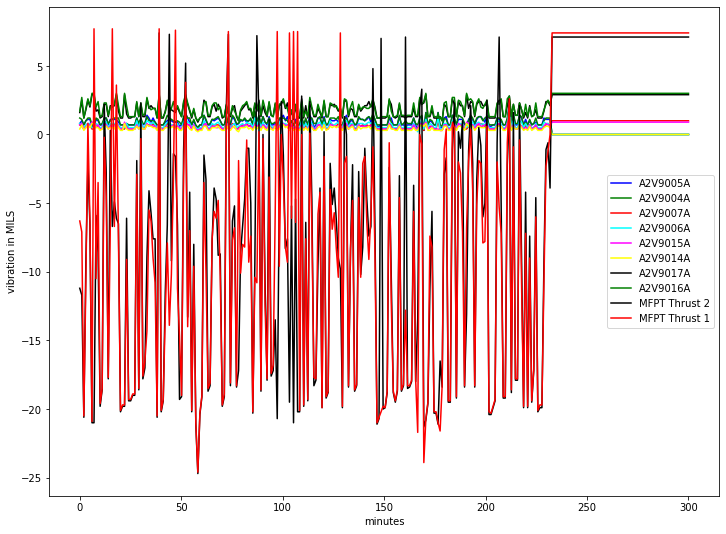

In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 300,300)
plt.xlabel('minutes')
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, df_rpm_middle['A2V9005A'].head(300),label="A2V9005A", color='blue' )
plt.plot(x, df_rpm_middle['A2V9004A'].head(300),label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_middle['A2V9007A'].head(300),label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_middle['A2V9006A'].head(300),label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_middle['A2V9015A'].head(300),label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_middle['A2V9014A'].head(300),label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_middle['A2V9017A'].head(300),label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_middle['A2V9016A'].head(300),label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_middle['A2V9019A'].head(300),label="MFPT Thrust 2", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_rpm_middle['A2V9018A'].head(300),label="MFPT Thrust 1", color='red')           # short color code (rgbcmyk)

# twin object for two different y-axis on the sample plot
ax.legend(loc='center right')
plt.show()

Text(0.5, 0, 'Thrust 2 (MILS)')

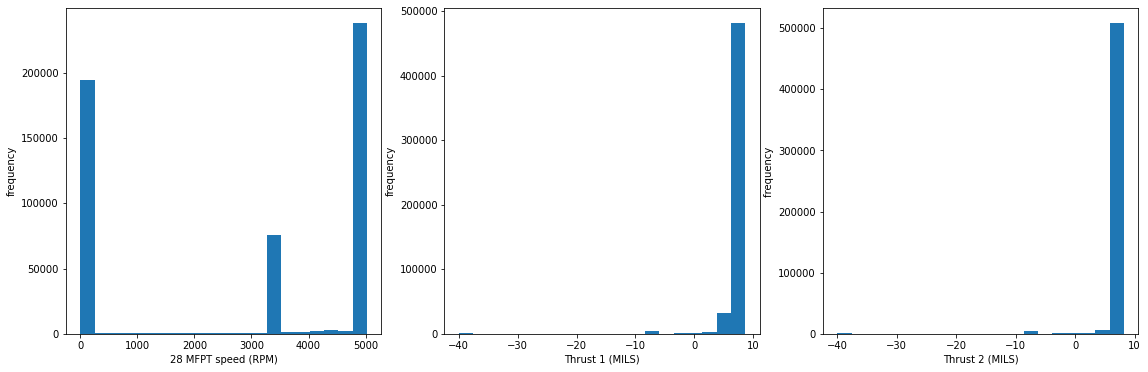

In [ ]:
plt.subplots(figsize=(26, 6))
plt.subplot(1,4,1)
plt.hist(df_vib_2016['A2V9021A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('28 MFPT speed (RPM)')
#plt.axvline(df_vib_2016['A2V9021A'].mean(), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(df_vib_2016['A2V9021A'], [25])-1.5*(np.percentile(df_vib_2016['A2V9021A'], [75])-np.percentile(df_vib_2016['A2V9021A'], [25])), color='red', linestyle='dashed', linewidth=2)
#plt.axvline(np.percentile(df_vib_2016['A2V9021A'], [75])+1.5*(np.percentile(df_vib_2016['A2V9021A'], [75])-np.percentile(df_vib_2016['A2V9021A'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(1,4,2)
plt.hist(df_vib_2016['A2V9019A'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Thrust 1 (MILS)')
#plt.axvline(df_vib_2016['A2V9016A'].mean(), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(df_vib_2016['A2V9016A'], [25])-1.5*(np.percentile(df_vib_2016['A2V9016A'], [75])-np.percentile(df_vib_2016['A2V9016A'], [25])), color='red', linestyle='dashed', linewidth=2)
#plt.axvline(np.percentile(df_vib_2016['A2V9016A'], [75])+1.5*(np.percentile(df_vib_2016['A2V9016A'], [75])-np.percentile(df_vib_2016['A2V9016A'], [25])), color='red', linestyle='dashed', linewidth=2)


plt.subplot(1,4,3)
plt.hist(df_vib_2016['A2V9018A'], density=False, bins=20)
plt.ylabel('frequency ')
plt.xlabel('Thrust 2 (MILS)')
#plt.axvline(df_vib_2016['A2V9019A'].mean(), color='k', linestyle='dashed', linewidth=1)
#plt.axvline(np.percentile(df_vib_2016['A2V9019A'], [25])-1.5*(np.percentile(df_vib_2016['A2V9019A'], [75])-np.percentile(df_vib_2016['A2V9019A'], [25])), color='red', linestyle='dashed', linewidth=2)
#plt.axvline(np.percentile(df_vib_2016['A2V9019A'], [75])+1.5*(np.percentile(df_vib_2016['A2V9019A'], [75])-np.percentile(df_vib_2016['A2V9019A'], [25])), color='red', linestyle='dashed', linewidth=2)



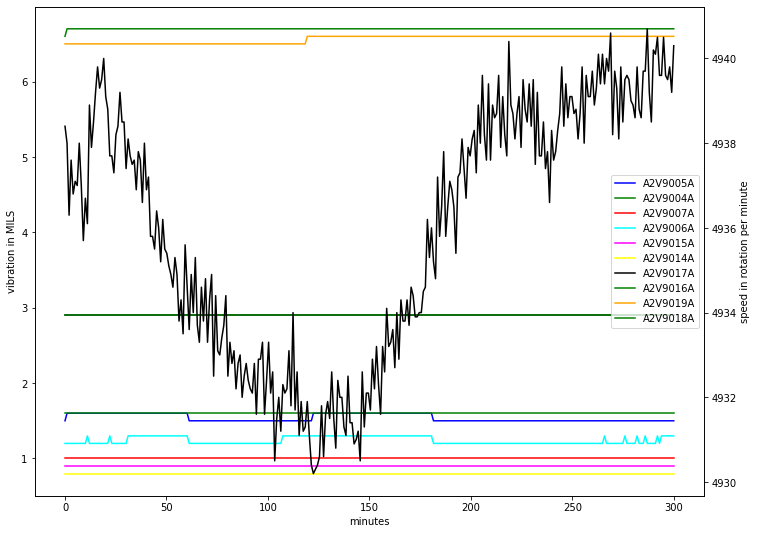

In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 300,300)
plt.xlabel('minutes')
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, df_vib_2016['A2V9005A'].head(300),label="A2V9005A", color='blue' )
plt.plot(x, df_vib_2016['A2V9004A'].head(300),label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9007A'].head(300),label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9006A'].head(300),label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9015A'].head(300),label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9014A'].head(300),label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9017A'].head(300),label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9016A'].head(300),label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9019A'].head(300),label="A2V9019A", color='orange')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9018A'].head(300),label="A2V9018A", color='g')           # short color code (rgbcmyk)

# twin object for two different y-axis on the sample plot

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, df_vib_2016['A2V9021A'].head(300),color="black")
ax2.set_ylabel('speed in rotation per minute')
ax.legend(loc='center right')
plt.show()

In [ ]:
#upload raw dataset
df_handfilled = pd.read_excel('humanfilled.xlsx')
df_handfilled.dtypes

Position          object
Date and Time     object
RPM                int64
APS               object
overall          float64
para1            float64
para2            float64
para3            float64
para4            float64
para5             object
para6             object
dtype: object

In [ ]:
df_handfilled1=df_handfilled.drop(['Position','Date and Time'], axis=1)
df_handfilled1.columns=['RPM','APS','overall','Param1','Param2','Param3','Param4','Param5','Param6']
#df_handfilled1.dtypes
#df_handfilled['APS'].astype(int)
df_handfilled2=df_handfilled1[['RPM','overall']]

In [ ]:
df_handfilled3=df_handfilled[['Position','Date and Time','RPM','overall']]

In [ ]:
#print(len(df_handfilled.Position.unique()
6.1**(-5)

0.00011839976078701774

In [ ]:
import chardet
with open(humanfilled_params_modified.xlsx, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

NameError: ignored

In [ ]:
#upload after modifying those columns who has value in range
df_handfilled_param_modified = pd.read_excel('humanfilled_params_modified.xlsx')
df_handfilled_param_modified


Position          object
Date and Time     object
RPM                int64
APS               object
overall          float64
para1            float64
para2            float64
para3            float64
para4            float64
para5            float64
para6            float64
dtype: object

In [ ]:
df_handfilled3['param_overall_MILS'] = df_handfilled_param_modified.apply(lambda row: row.overall*19.1*1000 / row.RPM, axis=1)
df_handfilled3['param1_MILS'] = df_handfilled_param_modified.apply(lambda row: row.para1*19.1*1000 / row.RPM, axis=1)
df_handfilled3['param2_MILS'] = df_handfilled_param_modified.apply(lambda row: row.para2*19.1*1000 / row.RPM, axis=1)
df_handfilled3['param3_MILS'] = df_handfilled_param_modified.apply(lambda row: row.para3*19.1*1000 / row.RPM, axis=1)
df_handfilled3['param4_MILS'] = df_handfilled_param_modified.apply(lambda row: row.para4*19.1*1000 / row.RPM, axis=1)
df_handfilled3['param5_MILS'] = df_handfilled_param_modified.apply(lambda row: row.para5*19.1*1000 / row.RPM, axis=1)
df_handfilled3['param6_MILS'] = df_handfilled_param_modified.apply(lambda row: row.para6*19.1*1000 / row.RPM, axis=1)
df_handfilled4=df_handfilled3.iloc[:,4:11]
cols=df_handfilled4.columns.values
cols=['param_overall_MILS', 'param1_MILS', 'param2_MILS', 'param3_MILS',
       'param4_MILS', 'param5_MILS']
df_humanfilled5=df_handfilled4[['param_overall_MILS', 'param1_MILS', 'param2_MILS', 'param3_MILS',
       'param4_MILS', 'param5_MILS','param6_MILS']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
from google.colab import files
df_humanfilled5.to_csv('df_humanfilled5.csv')
files.download('df_humanfilled5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_humanfilled5.describe()

In [ ]:
df_vib_2016.describe()

In [ ]:
#The following formula is used to transform In/Sec to MILS
#D (MILS)= 19.1*1000*V(In/Sec)/RPM

In [ ]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df_handfilled1['overall'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('overall')
plt.axvline(df_handfilled1['overall'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['overall'], [25])-1.5*(np.percentile(df_handfilled1['overall'], [75])-np.percentile(df_handfilled1['overall'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['overall'], [75])+1.5*(np.percentile(df_handfilled1['overall'], [75])-np.percentile(df_handfilled1['overall'], [25])), color='red', linestyle='dashed', linewidth=2)

In [ ]:
plt.subplots(figsize=(18, 8))
plt.subplot(2,3,1)
plt.hist(df_handfilled1['overall'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('overall')
plt.axvline(df_handfilled1['overall'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['overall'], [25])-1.5*(np.percentile(df_handfilled1['overall'], [75])-np.percentile(df_handfilled1['overall'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['overall'], [75])+1.5*(np.percentile(df_handfilled1['overall'], [75])-np.percentile(df_handfilled1['overall'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(2,3,2)
plt.hist(df_handfilled1['Param1'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param1 (In/Sec)')
plt.axvline(df_handfilled1['Param1'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param1'], [25])-1.5*(np.percentile(df_handfilled1['Param1'], [75])-np.percentile(df_handfilled1['Param1'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param1'], [75])+1.5*(np.percentile(df_handfilled1['Param1'], [75])-np.percentile(df_handfilled1['Param1'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(2,3,3)
plt.hist(df_handfilled1['Param2'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param2 (In/Sec)')
plt.axvline(df_handfilled1['Param2'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param2'], [25])-1.5*(np.percentile(df_handfilled1['Param2'], [75])-np.percentile(df_handfilled1['Param2'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param2'], [75])+1.5*(np.percentile(df_handfilled1['Param2'], [75])-np.percentile(df_handfilled1['Param2'], [25])), color='red', linestyle='dashed', linewidth=2)


plt.subplot(2,3,4)
plt.hist(df_handfilled1['Param3'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param3')
plt.axvline(df_handfilled1['Param3'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param3'], [25])-1.5*(np.percentile(df_handfilled1['Param3'], [75])-np.percentile(df_handfilled1['Param3'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param3'], [75])+1.5*(np.percentile(df_handfilled1['Param3'], [75])-np.percentile(df_handfilled1['Param3'], [25])), color='red', linestyle='dashed', linewidth=2)

plt.subplot(2,3,5)
plt.hist(df_handfilled1['Param4'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param4')
plt.axvline(df_handfilled1['Param4'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param4'], [25])-1.5*(np.percentile(df_handfilled1['Param4'], [75])-np.percentile(df_handfilled1['Param4'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param4'], [75])+1.5*(np.percentile(df_handfilled1['Param4'], [75])-np.percentile(df_handfilled1['Param4'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df_handfilled1['Param2'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param2')
plt.axvline(df_handfilled1['Param2'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param2'], [25])-1.5*(np.percentile(df_handfilled1['Param2'], [75])-np.percentile(df_handfilled1['Param2'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param2'], [75])+1.5*(np.percentile(df_handfilled1['Param2'], [75])-np.percentile(df_handfilled1['Param2'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
plt.subplots(figsize=(15, 10))
plt.subplot(3,3,1)
plt.hist(df_handfilled1['Param3'], density=False, bins=20)
plt.ylabel('frequency')
plt.xlabel('Param3')
plt.axvline(df_handfilled1['Param3'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.percentile(df_handfilled1['Param3'], [25])-1.5*(np.percentile(df_handfilled1['Param3'], [75])-np.percentile(df_handfilled1['Param3'], [25])), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(df_handfilled1['Param3'], [75])+1.5*(np.percentile(df_handfilled1['Param3'], [75])-np.percentile(df_handfilled1['Param3'], [25])), color='red', linestyle='dashed', linewidth=2)


In [ ]:
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#A2V9005A	A2V9004A	A2V9007A	A2V9006A	A2V9015A	A2V9014A	A2V9017A	A2V9016A	A2V9019A	A2V9018A
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 300,300)
plt.xlabel('minutes')
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, df_vib_2016['A2V9005A'].head(300),label="A2V9005A", color='blue' )
plt.plot(x, df_vib_2016['A2V9004A'].head(300),label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9007A'].head(300),label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9006A'].head(300),label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9015A'].head(300),label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9014A'].head(300),label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9017A'].head(300),label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9016A'].head(300),label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9019A'].head(300),label="A2V9019A", color='orange')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9018A'].head(300),label="A2V9018A", color='g')           # short color code (rgbcmyk)

# twin object for two different y-axis on the sample plot

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, df_vib_2016['A2V9021A'].head(300),color="black")
ax2.set_ylabel('speed in rotation per minute')
ax.legend(loc='best')
plt.show()

In [ ]:
'RPM','APS','overall','Param1','Param2','Param3','Param4','Param5','Param6'
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 844,844)
plt.xlabel('time')
plt.ylabel('RPM')      # specify color by name
plt.plot(x, df_handfilled1['RPM'],label="A2V9005A", color='blue' )
#plt.plot(x, df_handfilled1['APS'].head(300),label="A2V9004A", color='green')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled1['overall'].head(300),label="A2V9007A", color='red')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled1['Param1'].head(300),label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled1['Param2'].head(300),label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled1['Param3'].head(300),label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled1['Param4'].head(300),label="A2V9017A", color='black')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled1['Param5'].head(300),label="A2V9016A", color='g')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled1['Param6'].head(300),label="A2V9019A", color='orange')           # short color code (rgbcmyk)
plt.show()

In [ ]:
df_handfilled.describe()

In [ ]:
df_handfilled[df_handfilled['RPM']==48671]

In [ ]:
df_handfilled[df_handfilled['APS']==48671]

In [ ]:
df_handfilled1['RPM'].astype(str)
df_handfilled1.dtypes

In [ ]:
'RPM','APS','overall','Param1','Param2','Param3','Param4','Param5','Param6'
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 100,100)
plt.xlabel('time')
plt.ylabel('In/Sec')      # specify color by name
#plt.plot(x, df_handfilled1['RPM'],label="A2V9005A", color='blue' )
#plt.plot(x, df_handfilled1['APS'].head(300),label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled1['overall'].head(100),label="overall", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled1['Param1'].head(100),label="Param1", color='orange')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled1['Param2'].head(100),label="Param2", color='blue')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled1['Param3'].head(100),label="Param3", color='black')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled1['Param4'].head(300),label="A2V9017A", color='black')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled1['Param5'].head(300),label="A2V9016A", color='g')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled1['Param6'].head(300),label="A2V9019A", color='orange')           # short color code (rgbcmyk)
ax.legend(loc='upper left')
plt.show()




In [ ]:
# the following neural network to discover if there is any relation between parameters. If there is strong relation then neural
# network regression method should be able to predict any parameters with high accuracy


In [ ]:
df_handfilled_param_modified.columns


In [ ]:
df_handfilled_param_modified_x=df_humanfilled5.iloc[:,1:5]
df_handfilled_param_modified_y=df_humanfilled5.iloc[:,5:7]
#df_handfilled_param_modified_y
df_handfilled_param_modified_x

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import InputLayer
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_handfilled_param_modified_x, df_handfilled_param_modified_y, test_size=.3, random_state=45)

In [ ]:
model = Sequential()
#model.add(Dense(6, input_dim=6, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(20, input_dim=4, kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='relu'))
model.add(Dense(2,kernel_initializer=keras.initializers.glorot_uniform(seed=66), activation='linear'))
model.summary()

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
>>> history = model.fit(X_train1, y_train1,epochs=250, batch_size=50, verbose=1,validation_split=0.3, callbacks=EarlyStopping(monitor='val_loss', verbose=0,patience=15))

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
ynew1= model.predict(X_test1)
#ynew1

In [ ]:
y_test1.to_numpy()

In [ ]:
ytest1=y_test1.to_numpy()
ytest1

In [ ]:
np.mean(abs((ytest1[:,1].reshape(254,1)- ynew1[:,1].reshape(254,1))/ytest1[:,1].reshape(254,1)))*100

In [ ]:
Error = np.sum(np.abs(np.subtract(ytest1[:,1],ynew1[:,1])))
Average = np.sum(ytest1[:,1])
MAPE = Error/Average
MAPE

In [ ]:
df_handfilled4
df_handfilled4[df_handfilled4['RPM']==48671]

In [ ]:
df_handfilled[df_handfilled['RPM']==48671]

In [ ]:
df_vib_2016_1.describe()

In [ ]:
df_handfilled3.columns.unique()

In [ ]:
df_handfilled3.dtypes
Position_str=str(df_handfilled3.Position)
Position_str

In [ ]:
df_handfilled3.Position.value_counts()
#df_handfilled3[(df_handfilled3['Position'] == 2-PMP-3-70-2H)]
df_handfilledspe=df_handfilled3.loc[df_handfilled3['Position']==2-PMP-3-70-2H]
df_handfilledspe


In [ ]:
df[(df['USER'].str.contains('\'STATUS\': u\'ACTV\'')) ]

In [ ]:
# compare between two measurement points
#2-PMP-3-70-2H

In [ ]:
df_humanfilled_time=df_handfilled3.sort_values(["Date and Time"], axis=0,
                 ascending=True, inplace=True)

In [ ]:
df_handfilled3
from google.colab import files
df_handfilled3.to_csv('df_handfilled3.csv')
files.download('df_handfilled3.csv')

In [ ]:
df_handfilled_one = pd.read_excel('df_handfilled_onemp.xlsx')
df_handfilled_one.columns

In [ ]:
#index', 'position', 'RPM', 'overall', 'para1', 'para2', 'para3', 'para4', 'para5', 'para6'
#lebel in each plt.plot is for legends
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 75,75)
plt.xlabel('time')
plt.ylabel('In/Sec')      # specify color by name
#plt.plot(x, df_handfilled_one['RPM'],label="A2V9005A", color='blue' )
#plt.plot(x, df_handfilled_one['APS'].head(300),label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled_one['overall'],label="overall", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled_one['para1'],label="Param1", color='orange')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled_one['para2'],label="Param2", color='blue')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled_one['para3'],label="Param3", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled_one['para4'],label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled_one['para5'],label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled_one['para6'],label="A2V9019A", color='orange')           # short color code (rgbcmyk)
ax.legend(loc='upper left')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
x = np.linspace(0, 75,75)
plt.xlabel('minutes')
plt.ylabel('vibration in MILS')      # specify color by name
plt.plot(x, df_vib_2016['A2V9005A'].head(75),label="A2V9005A", color='blue' )
plt.plot(x, df_vib_2016['A2V9004A'].head(75),label="A2V9004A", color='green')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9007A'].head(75),label="A2V9007A", color='red')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9006A'].head(75),label="A2V9006A", color='cyan')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9015A'].head(75),label="A2V9015A", color='magenta')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9014A'].head(75),label="A2V9014A", color='yellow')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9017A'].head(75),label="A2V9017A", color='black')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9016A'].head(75),label="A2V9016A", color='g')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9019A'].head(75),label="A2V9019A", color='orange')           # short color code (rgbcmyk)
plt.plot(x, df_vib_2016['A2V9018A'].head(75),label="A2V9018A", color='g')           # short color code (rgbcmyk)
plt.plot(x, df_handfilled_one['overall'],label="overall", color='black')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled_one['para1'],label="Param1", color='orange')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled_one['para2'],label="Param2", color='blue')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled_one['para3'],label="Param3", color='black')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled_one['para4'],label="A2V9017A", color='black')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled_one['para5'],label="A2V9016A", color='g')           # short color code (rgbcmyk)
#plt.plot(x, df_handfilled_one['para6'],label="A2V9019A", color='orange')
# twin object for two different y-axis on the sample plot

#ax2=ax.twinx()
# make a plot with different y-axis using second axis object
#ax2.plot(x, df_vib_2016['A2V9021A'].head(75),color="black")
#ax2.set_ylabel('speed in rotation per minute')
ax.legend(loc='best')
plt.show()

In [ ]:
df_humanfilled5


In [ ]:
df_humanfilled5
from google.colab import files

df_humanfilled5.to_csv('df_humanfilled5.csv')
files.download('df_handfilled5.csv')

In [ ]:
df_handfilled_test = pd.read_csv('df_handfilled5.csv')
df_handfilled_test.corr()
df_handfilled_param_modified.corr()

In [ ]:
df_vib_2016[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A',
       'A2V9015A', 'A2V9014A', 'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A',
       'A2V9018A']].corr()

In [ ]:
reg = LinearRegression().fit(X_train1, y_train1)
>>> reg.score(X_train1, y_train1)
ynew11=reg.predict(X_test1)

In [ ]:
Error1 = np.sum(np.abs(np.subtract(ytest1[:,1],ynew11[:,1])))
Average1 = np.sum(ytest1[:,1])
MAPE1 = Error1/Average1
MAPE1

In [ ]:
#Error2 = np.sum(np.abs(np.subtract(ytest1[:,0],ynew11[:,0])))
#Average2 = np.sum(ytest1[:,0])
#MAPE2 = Error2/Average2
#MAPE2
df_vib_2016_1.columns

Index(['Dates', 'Time', 'A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A',
       'A2V9015A', 'A2V9014A', 'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A',
       'A2V9018A'],
      dtype='object')

In [ ]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df_vib_2016_1[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A',
       'A2V9015A', 'A2V9014A', 'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A',
       'A2V9018A']])
y1_pred = model.predict(df_vib_2016_1[['A2V9005A', 'A2V9004A', 'A2V9007A', 'A2V9006A',
       'A2V9015A', 'A2V9014A', 'A2V9017A', 'A2V9016A', 'A2V9021A', 'A2V9019A',
       'A2V9018A']])
y1_pred

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [ ]:
# filter outlier index
outlier_index1 = where(y1_pred == -1)
# filter outlier values
outlier_values1 = df_vib_2016_1.iloc[outlier_index1]
outlier_values1
outlier_values1


,Dates,Time,A2V9005A,A2V9004A,A2V9007A,A2V9006A,A2V9015A,A2V9014A,A2V9017A,A2V9016A,A2V9021A,A2V9019A,A2V9018A
57594,2016-02-09,23:54:00,0.3,0.4,0.3,0.2,0.3,0.2,0.7,0.4,101.4,2.2,2.3
73082,2016-02-20,18:02:00,0.7,0.8,0.5,0.5,0.4,0.3,1.3,1.4,3813.2,-18.2,-18.1
73887,2016-02-21,07:27:00,0.7,0.8,0.4,0.5,0.4,0.4,1.3,1.3,3568.1,-18.6,-18.5
74168,2016-02-21,12:08:00,0.6,0.6,0.4,0.4,0.3,0.3,1.0,1.1,2831.6,-22.9,-22.9
74243,2016-02-21,13:23:00,1.1,0.8,0.5,0.8,0.6,0.5,2.0,2.1,2198.1,-6.9,-7.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199625,2016-05-18,15:05:00,0.7,0.7,0.4,0.5,0.4,0.3,1.2,1.3,3527.3,7.3,-19.7
199638,2016-05-18,15:18:00,0.5,0.5,0.3,0.3,0.3,0.2,0.9,0.9,2189.2,-25.8,-25.7
199656,2016-05-18,15:36:00,1.0,0.7,0.4,0.5,0.6,0.5,1.3,1.9,1980.7,-8.9,-10.7
199825,2016-05-18,18:25:00,0.6,0.6,0.4,0.4,0.4,0.3,1.2,1.2,1006.5,-25.1,-23.2


In [ ]:
# import libraries
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where

In [ ]:
anomaly = pd.read_csv('anomaly.csv')
anomaly_overall=anomaly[['param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS']]
anomaly1=anomaly['param_overall_MILS']
anomaly2=anomaly['param1_MILS']
anomaly3=anomaly['param2_MILS']
anomaly4=anomaly['param3_MILS']
anomaly5=anomaly['param4_MILS']
anomaly6=anomaly['param5_MILS']
anomaly7=anomaly['param6_MILS']

In [ ]:
anomaly.columns

Index(['Position', 'Date and Time', 'RPM', 'APS', 'param_overall_MILS',
       'param1_MILS', 'param2_MILS', 'param3_MILS', 'param4_MILS',
       'param5_MILS', 'param6_MILS'],
      dtype='object')

In [ ]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(anomaly_overall)
y_pred = model.predict(anomaly_overall)
y_pred


array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
# filter outlier index
outlier_index = where(y_pred == -1)
# filter outlier values
outlier_values = anomaly.iloc[outlier_index]
outlier_values
outlier_values


,Position,Date and Time,RPM,APS,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
0,2-PMP-3-70-1V,20-Jan-16 13:56,4950,100,0.111899,0.111899,0.006174,0.000772,0.001543,0.000424,0.002624
4,2-PMP-3-70-1H,07-May-20 02:52,4300,65,0.119930,0.075512,0.053302,0.053302,0.048860,0.002665,0.017323
34,2-PMP-3-70-2V,06-May-19 11:47,48671,100,0.027863,0.027470,0.003414,0.003571,0.001138,0.000137,0.000432
72,2-PMP-3-70-2H,06-May-19 11:47,48671,100,0.048661,0.041205,0.004317,0.019229,0.005494,0.000981,0.001370
109,2-PMP-3-70-2H,06-May-19 11:47,48671,100,0.040813,0.040028,0.003610,0.008241,0.001452,0.000188,0.000628
149,2-PMP-3-70-3V,09-Dec-18 16:01,3800,50,1.769263,0.266395,0.150789,0.216132,0.623263,1.040447,1.352079
153,2-PMP-3-70-3V,06-May-19 11:47,48671,100,0.056510,0.016482,0.040028,0.021976,0.038851,0.000078,0.000118
172,2-PMP-3-70-3H,07-Feb-17 09:19,4900,100,1.824245,0.210490,0.085755,0.113041,0.101347,1.777469,0.296245
174,2-PMP-3-70-3H,09-Feb-17 08:37,4900,100,2.011347,0.206592,0.120837,0.062367,0.085755,1.976265,0.284551
175,2-PMP-3-70-3H,01-Mar-17 08:41,4900,100,1.882714,0.124735,0.105245,0.077959,0.089653,1.828143,0.229980


In [ ]:
df_humanfilled5.describe()

,param_overall_MILS,param1_MILS,param2_MILS,param3_MILS,param4_MILS,param5_MILS,param6_MILS
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,0.594946,0.127085,0.219262,0.078148,0.104166,0.360971,0.168086
std,0.357455,0.065140,0.177978,0.076353,0.065809,0.421983,0.131831
min,0.027863,0.016482,0.003414,0.000772,0.001138,0.000078,0.000078
25%,0.358946,0.086743,0.122161,0.034793,0.064790,0.031820,0.051729
50%,0.486035,0.116701,0.181545,0.050907,0.085755,0.194501,0.160542
75%,0.735803,0.153138,0.248997,0.085741,0.120868,0.568957,0.235800
max,2.141692,0.648973,1.638268,0.508067,0.623263,2.056024,1.352079


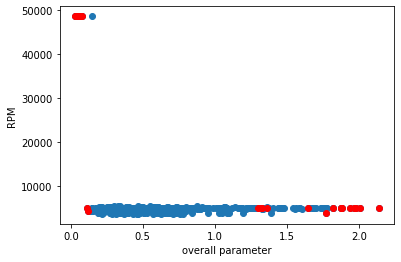

In [ ]:
plt.scatter(anomaly["param_overall_MILS"], anomaly["RPM"])
plt.scatter(outlier_values["param_overall_MILS"], outlier_values["RPM"], c = "r")
plt.xlabel("overall parameter")
plt.ylabel("RPM")
plt.show()

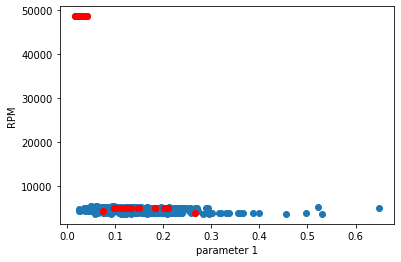

In [ ]:
plt.scatter(anomaly["param1_MILS"], anomaly["RPM"])
plt.scatter(outlier_values["param1_MILS"], outlier_values["RPM"], c = "r")
plt.xlabel("parameter 1")
plt.ylabel("RPM")
plt.show()

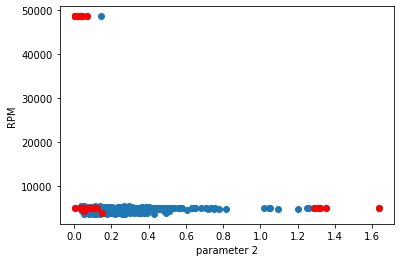

In [ ]:
plt.scatter(anomaly["param2_MILS"], anomaly["RPM"])
plt.scatter(outlier_values["param2_MILS"], outlier_values["RPM"], c = "r")
plt.xlabel("parameter 2")
plt.ylabel("RPM")
plt.show()